# Audit of Data Quality & EDA of Online Retail Transactions

## Overview
The project focuses on the analysis of transactional data of an online retail company to discover meaningful business insights related to:
- Sales performance,
- Customer behavior,
- Product demand

Data Quality audit is performed before any other step to ensure the reliability and consistency of the dataset.

## Data Audit

In [1]:
import pandas as pd
import numpy as np

In [3]:
# loading the dataset
try:
    df = pd.read_excel("Online_Retail.xlsx")
    print("The set was successfully uploaded.")
except FileNotFoundError:
    print("ERROR - The file was not found :(")
except Exception as e:
    print("Unexpected error...")

The set was successfully uploaded.


### Structural Research

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Almost 25% of CustomerID is missing
- CustomerID is of type **float64** which is not normal. Most IDs are of type int64
- Description is missing 1454 rows

In [7]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [8]:
print("Zero or below zero quantities: ", (df["Quantity"] <= 0).sum())
print("Zero or below zero unit prices: ", (df["UnitPrice"] <= 0).sum())

Zero or below zero quantities:  10624
Zero or below zero unit prices:  2517


Negative quantities can be returns!

In [9]:
df[df["Quantity"] <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


### Validity Checks: Quantity and Unit Price

Transactional retail datasets often contain non-standard entries such as returns, cancellations, and manual adjustments. To avoid biased revenue and product-performance insights, the dataset is evaluated for potentially invalid transactions.

Two key validity checks are applied:
- `Quantity <= 0`: may represent product returns, refunds, or cancellation-related entries.
- `UnitPrice <= 0`: may represent free items, promotional adjustments, or erroneous pricing records.

These records are not automatically removed. Instead, they are investigated and classified to determine whether they reflect legitimate business events (e.g., returns) or data errors requiring exclusion from revenue-based analyses.

In [10]:
# Splitting zero and negative quantities

quantity_zero = (df["Quantity"] == 0).sum()
quantity_negative = (df["Quantity"] < 0).sum()

In [11]:
# Splitting zero and negative unit prices

unitprice_zero = (df["UnitPrice"] == 0).sum()
unitprice_negative = (df["UnitPrice"] < 0).sum()

In [12]:
print("Number of zero quantities: ", quantity_zero)
print("Number of negative quantities: ", quantity_negative)
print("Number of zero unit prices: ", unitprice_zero)
print("Number of negative unit prices: ", unitprice_negative)

Number of zero quantities:  0
Number of negative quantities:  10624
Number of zero unit prices:  2515
Number of negative unit prices:  2


In [13]:
df[df["Quantity"] < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [14]:
df[df["UnitPrice"] <= 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom


Invoices that start with “C” typically indicate cancellation/credit note behavior.

In [15]:
df["IsCancellation"] = df["InvoiceNo"].astype(str).str.startswith("C")
df["IsCancellation"].value_counts()

IsCancellation
False    532621
True       9288
Name: count, dtype: int64

In [16]:
df[df["IsCancellation"]].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancellation
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,True
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,True


### Investigation of Anomalous Transactions

Further inspection of anomalous records reveals a strong pattern among transactions with `UnitPrice = 0`. These records consistently lack both `CustomerID` and product descriptions, indicating that they are not associated with identifiable customers or standard product listings.

Additionally, all non-positive quantity values are strictly negative, with no zero-quantity transactions observed. This pattern, combined with the presence of invoice numbers prefixed with "C", strongly suggests that these entries represent cancellations, returns, or system-level accounting adjustments rather than genuine sales activity.

Given their lack of customer association and their non-revenue-generating nature, these records are considered unsuitable for analyses related to sales performance, customer behavior, or product demand. However, they provide useful context regarding operational processes such as returns and cancellations and are therefore retained for transparency.

### Analytical Dataset

To ensure that revenue, product, and customer analyses reflect genuine sales activity, a filtered analytical dataset is constructed. Transactions associated with cancellations, returns, zero-priced entries, or non-positive quantities are excluded from revenue-based analyses.

This approach preserves the integrity of sales metrics while maintaining the original dataset for transparency and potential operational insights related to returns and system adjustments.

In [17]:
# Creating the sales dataset
df_sales = df[
    (df["Quantity"] > 0) &
    (df["UnitPrice"] > 0) &
    (~df["InvoiceNo"].astype(str).str.startswith("C"))
].copy()

In [18]:
df_sales.shape

(530104, 9)

In [19]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [20]:
removed_percentage = 1 - (len(df_sales) / len(df))
removed_amount = len(df) - len(df_sales)

removed_percentage, removed_amount

(0.02178410028251976, 11805)

In [21]:
df_sales.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


Most customers buy small quantities, but a few transactions dominate volume.

### Summary Statistics After Audit

After excluding cancellations, returns, and non-revenue transactions, the remaining dataset reflects realistic sales behavior. Transaction quantities are strictly positive, with most purchases consisting of small basket sizes and a limited number of high-volume outliers likely representing bulk or wholesale orders.

Unit prices are largely concentrated in low-to-mid ranges, consistent with typical online retail pricing, while a small number of extreme values suggest premium products or aggregated pricing. These values are retained for analysis but flagged for interpretative caution.

The temporal coverage spans a full calendar year, enabling robust time-based analyses such as seasonality and demand trends. Overall, the validated dataset provides a reliable foundation for revenue, product, and customer-level exploration.

In [22]:
# creating revenue
df_sales["Revenue"] = df_sales["Quantity"] * df_sales["UnitPrice"]

In [23]:
df_sales["Revenue"].describe()

count    530104.000000
mean         20.121871
std         270.356743
min           0.001000
25%           3.750000
50%           9.900000
75%          17.700000
max      168469.600000
Name: Revenue, dtype: float64

Revenue analysis is conducted only after validating the dataset to ensure that calculated values reflect genuine sales activity. Including cancellations, returns, or system-generated records would distort revenue distributions and lead to misleading conclusions about performance drivers.

By validating the data first, revenue trends can be accurately linked to transactional attributes such as product demand, customer behavior, and seasonal effects, allowing observed increases or declines to be interpreted as meaningful business signals rather than artifacts of data quality issues.

The distribution of transaction-level revenue is highly right-skewed, with the majority of orders generating relatively low revenue and a small number of transactions contributing disproportionately large values. The median revenue per transaction is modest, indicating that typical purchases consist of low-cost items, while the presence of extreme outliers suggests occasional bulk or wholesale orders.

This pattern highlights the importance of analyzing both average trends and distributional behavior, as relying solely on mean values could overstate typical customer spending.

### When does the business make money?

In [24]:
df_sales["InvoiceMonth"] = df_sales["InvoiceDate"].dt.to_period("M")

In [25]:
# aggregation
monthly_revenue = (
    df_sales.groupby("InvoiceMonth")["Revenue"].sum().reset_index()
)

monthly_revenue 

,InvoiceMonth,Revenue
0,2010-12,823746.140
1,2011-01,691364.560
2,2011-02,523631.890
3,2011-03,717639.360
4,2011-04,537808.621
5,2011-05,770536.020
6,2011-06,761739.900
7,2011-07,719221.191
8,2011-08,759138.380
9,2011-09,1058590.172


Monthly revenue analysis reveals a clear upward shift in performance following the summer period, with a pronounced increase in sales volume during early autumn. This surge suggests heightened demand or intensified purchasing activity during this phase of the business cycle.

Toward the end of the year, revenue declines in December

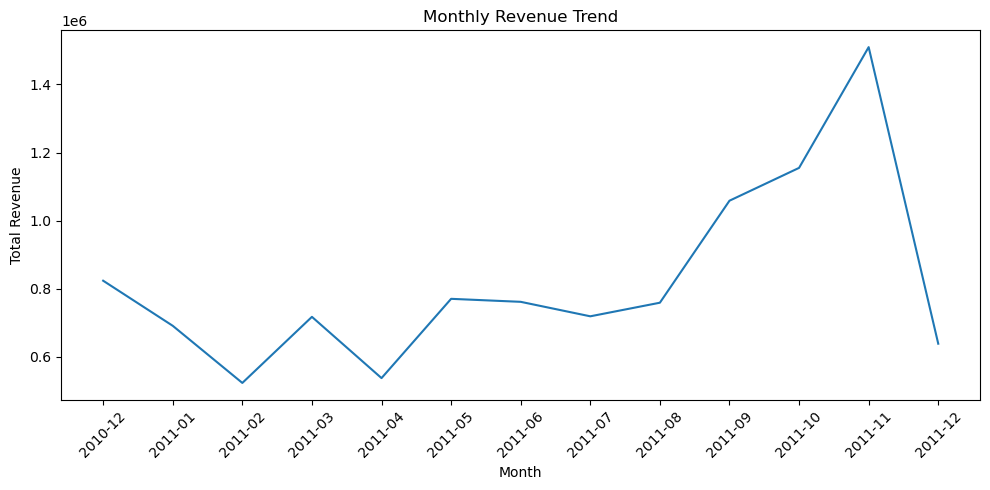

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue["InvoiceMonth"].astype(str), monthly_revenue["Revenue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

The visualization confirms a seasonal revenue pattern, with a significant increase in sales following the summer months and a notable decline toward December. This suggests that revenue generation is not evenly distributed throughout the year and may be influenced by seasonal demand cycles, operational constraints, or customer purchasing behavior.

Understanding these temporal dynamics is critical for inventory planning, marketing timing, and resource allocation.

#### Expensive VS More
Is the revenue boom driven by higher prices or higher volume?

In [29]:
df_sales.groupby("InvoiceMonth").agg(
    TotalRevenue = ("Revenue", "sum"),
    TotalQuantity = ("Quantity", "sum"),
    AvgUnitPrice = ("UnitPrice", "mean")
).reset_index()

,InvoiceMonth,TotalRevenue,TotalQuantity,AvgUnitPrice
0,2010-12,823746.140,359239,4.819298
1,2011-01,691364.560,387785,3.781700
2,2011-02,523631.890,283555,3.990775
3,2011-03,717639.360,377526,4.067487
4,2011-04,537808.621,308815,3.973183
5,2011-05,770536.020,395738,4.159303
6,2011-06,761739.900,389213,3.898057
7,2011-07,719221.191,401759,3.700570
8,2011-08,759138.380,421770,4.015137
9,2011-09,1058590.172,570820,3.547928


### Revenue Drivers: Volume vs Pricing

To understand the factors behind observed revenue fluctuations, monthly revenue is decomposed into total quantity sold and average unit price.

The results indicate that revenue growth is primarily volume-driven rather than price-driven. Periods of rapid revenue increase—particularly from September through November—coincide with substantial increases in total quantities sold, while average unit prices remain relatively stable or slightly lower.

This suggests that higher demand, increased order frequency, or bulk purchasing behavior is the dominant driver of revenue growth. Conversely, the sharp revenue decline observed in December aligns with a significant reduction in sales volume rather than changes in pricing strategy.

In [31]:
product_revenue = (
    df_sales
    .groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

product_quantity = (
    df_sales
    .groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [32]:
product_quantity

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

In [33]:
product_revenue

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: Revenue, dtype: float64

A comparison of top-selling products by quantity and by revenue reveals a clear divergence between high-volume and high-value items. Products that dominate sales volume are generally low-cost, frequently purchased items such as decorative goods, storage containers, and novelty products. These items contribute significantly to order frequency but generate relatively modest revenue per unit.

In contrast, the highest revenue contributors include non-product entries such as shipping charges (`DOTCOM POSTAGE`, `POSTAGE`) and manual adjustments. While these entries materially affect total revenue, they do not represent customer demand for physical products and must be interpreted separately.

This distinction highlights the importance of separating operational charges from merchandise sales when evaluating product performance, as volume-based popularity does not necessarily translate into revenue leadership.

In [34]:
non_product_keywords = ["POSTAGE", "Manual"]

df_products = df_sales[
    ~df_sales["Description"].str.contains("|".join(non_product_keywords), case=False, na=False)
]

In [35]:
df_products.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)

Description
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
RABBIT NIGHT LIGHT                     66964.99
PAPER CHAIN KIT 50'S CHRISTMAS         64952.29
ASSORTED COLOUR BIRD ORNAMENT          59094.93
CHILLI LIGHTS                          54117.76
Name: Revenue, dtype: float64

### Customer Revenue Concentration

Customer-level revenue analysis reveals a high degree of concentration among a small subset of buyers. The top individual customers contribute disproportionately to total revenue, indicating that a limited number of high-value customers play a critical role in overall business performance.

While this concentration can be beneficial in terms of predictable bulk purchasing, it also introduces dependency risk. The loss or reduced activity of a small number of key customers could result in a significant revenue impact. This highlights the importance of both retaining high-value customers and diversifying revenue sources through broader customer engagement.

Dependency on customers

In [36]:
customer_revenue = (
    df_products
    .groupby("CustomerID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

customer_revenue.head(10)

CustomerID
14646.0    279138.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    140450.72
12415.0    124564.53
14156.0    117379.63
17511.0     91062.38
12346.0     77183.60
16029.0     72882.09
Name: Revenue, dtype: float64

In [37]:
total_revenue = df_products["Revenue"].sum()
top10_revenue = customer_revenue.head(10).sum()
top10_share = top10_revenue / total_revenue

top10_share

0.14803074866559296

In [38]:
top50_share = customer_revenue.head(50).sum() / total_revenue
top50_share

0.2839656320440471

In [39]:
customer_revenue_cumsum = customer_revenue.cumsum() / total_revenue

customer_revenue_cumsum.head(20)

CustomerID
14646.0    0.027090
18102.0    0.052289
17450.0    0.071169
16446.0    0.087519
14911.0    0.101150
12415.0    0.113238
14156.0    0.124630
17511.0    0.133467
12346.0    0.140958
16029.0    0.148031
16684.0    0.154499
13694.0    0.160811
15311.0    0.166709
13089.0    0.172418
17949.0    0.178049
15769.0    0.183508
15061.0    0.188801
14096.0    0.193969
14298.0    0.198970
14088.0    0.203870
Name: Revenue, dtype: float64

### Geographic Revenue Distribution

Revenue analysis by country reveals a highly concentrated geographic distribution, with the United Kingdom accounting for the vast majority of total sales. This indicates a strong domestic market presence and suggests that core business performance is primarily driven by UK-based customers.

While several international markets—such as the Netherlands, Ireland, Germany, and France—contribute meaningful revenue, their impact remains significantly smaller in comparison. These markets may represent growth opportunities, particularly if logistical efficiencies or targeted marketing strategies are applied.

At the same time, the heavy reliance on a single geographic market introduces concentration risk. Diversifying revenue streams across additional regions could help mitigate exposure to country-specific economic or operational disruptions.

In [40]:
df_products.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    8774773.674
Netherlands        283889.340
EIRE               276404.300
Germany            205569.890
France             184768.740
Australia          138171.310
Spain               55725.110
Switzerland         53087.900
Japan               37416.370
Belgium             36927.340
Name: Revenue, dtype: float64

___________

## Key Business Insights and Recommendations

The analysis reveals that revenue growth is primarily driven by sales volume rather than pricing increases, indicating strong demand sensitivity. Maintaining product availability and operational capacity during high-demand periods—particularly in early autumn—should be a strategic priority.

A small group of products serves as the backbone of revenue generation, combining both high sales volume and strong revenue contribution. These products should be protected from stockouts and considered for bundling or promotional strategies.

Revenue is also concentrated among a limited number of high-value customers and within a single geographic market. While this enables focused relationship management, it introduces dependency risk. Expanding customer acquisition efforts and exploring scalable international markets could improve long-term resilience.

Finally, operational charges such as shipping and manual adjustments significantly affect reported revenue and should be analyzed separately from merchandise performance to avoid distorted decision-making.

_____________

## Strategic Product Recommendations

Based on product-level demand and revenue analysis, products can be segmented into core drivers, traffic drivers, premium opportunities, and underperformers. Core products should be prioritized for availability and visibility, while traffic-driving items may benefit from controlled discounts or bundling strategies.

Underperforming products with consistently low demand and revenue should be reviewed for discontinuation or clearance to reduce operational complexity. Premium products, although lower in volume, represent opportunities for revenue growth through improved positioning rather than price reductions.

These recommendations aim to increase overall revenue efficiency without relying on price inflation, instead leveraging demand patterns and portfolio optimization.

In [41]:
product_metrics = (
    df_products
    .groupby("Description")
    .agg(
        TotalRevenue=("Revenue", "sum"),
        TotalQuantity=("Quantity", "sum"),
        AvgUnitPrice=("UnitPrice", "mean")
    )
)

product_metrics.head()

,TotalRevenue,TotalQuantity,AvgUnitPrice
Description,,,
4 PURPLE FLOCK DINNER CANDLES,290.80,144,2.455366
50'S CHRISTMAS GIFT BAG LARGE,2343.63,1915,1.426589
DOLLY GIRL BEAKER,2891.25,2455,1.502123
I LOVE LONDON MINI BACKPACK,1628.17,389,4.611364
I LOVE LONDON MINI RUCKSACK,4.15,1,4.150000


In [42]:
rev_q = product_metrics["TotalRevenue"].quantile(0.75)
qty_q = product_metrics["TotalQuantity"].quantile(0.75)

product_metrics["Category"] = "Underperformer"

product_metrics.loc[
    (product_metrics["TotalRevenue"] >= rev_q) &
    (product_metrics["TotalQuantity"] >= qty_q),
    "Category"
] = "Core Driver"

product_metrics.loc[
    (product_metrics["TotalRevenue"] < rev_q) &
    (product_metrics["TotalQuantity"] >= qty_q),
    "Category"
] = "Traffic Driver"

product_metrics.loc[
    (product_metrics["TotalRevenue"] >= rev_q) &
    (product_metrics["TotalQuantity"] < qty_q),
    "Category"
] = "Premium Opportunity"

product_metrics["Category"].value_counts()

Category
Underperformer         2701
Core Driver             690
Premium Opportunity     316
Traffic Driver          316
Name: count, dtype: int64

### Product Portfolio Actions

Analysis indicates that a large proportion of the product catalog contributes minimally to both revenue and sales volume. These underperforming products increase operational complexity without delivering proportional value and should be evaluated for clearance or discontinuation.

High-volume, low-revenue products play an important role in driving traffic and order frequency but should be strategically bundled or discounted in moderation. Core revenue drivers should be protected from aggressive pricing actions, while premium products represent opportunities for revenue growth through improved visibility rather than price reductions.

In [43]:
import seaborn as sns
import os

In [44]:
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.dpi"] = 140
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["axes.titleweight"] = "bold"

In [45]:
BUSINESS = {
    "primary": "#1f4e79",   # deep blue
    "secondary": "#2a9d8f", # teal
    "accent": "#e76f51",    # muted orange (use sparingly)
    "dark": "#2f2f2f",
    "light": "#f2f2f2"
}

In [46]:
FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)

def savefig(name):
    path = os.path.join(FIG_DIR, name)
    plt.tight_layout()
    plt.savefig(path, bbox_inches="tight")
    print("Saved:", path)

Saved: figures/01_monthly_revenue_trend.png


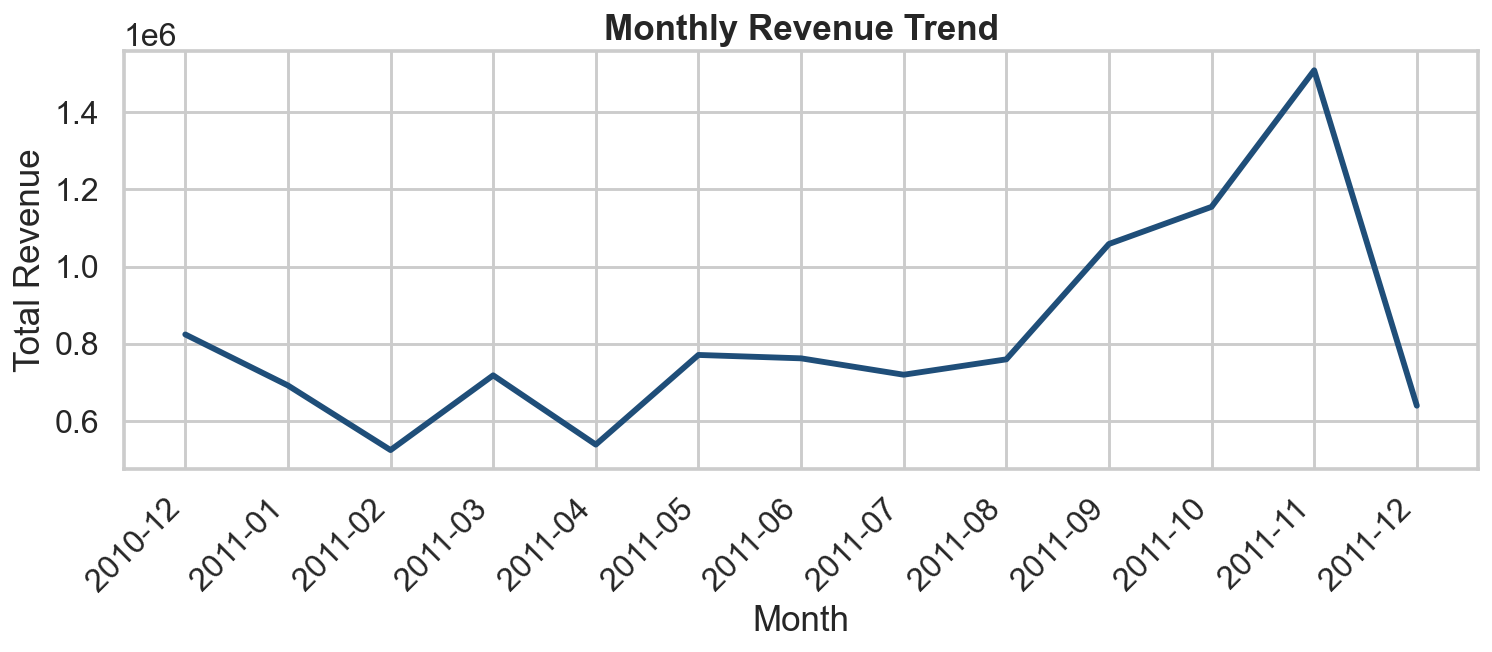

In [47]:
df_sales["Revenue"] = df_sales["Quantity"] * df_sales["UnitPrice"]
df_sales["InvoiceMonth"] = df_sales["InvoiceDate"].dt.to_period("M").astype(str)

monthly = df_sales.groupby("InvoiceMonth", as_index=False).agg(
    TotalRevenue=("Revenue", "sum"),
    TotalQuantity=("Quantity", "sum"),
    AvgUnitPrice=("UnitPrice", "mean")
)

plt.figure(figsize=(11,5))
sns.lineplot(data=monthly, x="InvoiceMonth", y="TotalRevenue", color=BUSINESS["primary"], linewidth=3)
plt.xticks(rotation=45, ha="right")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
savefig("01_monthly_revenue_trend.png")
plt.show()

Saved: figures/02_revenue_vs_quantity_dual_axis.png


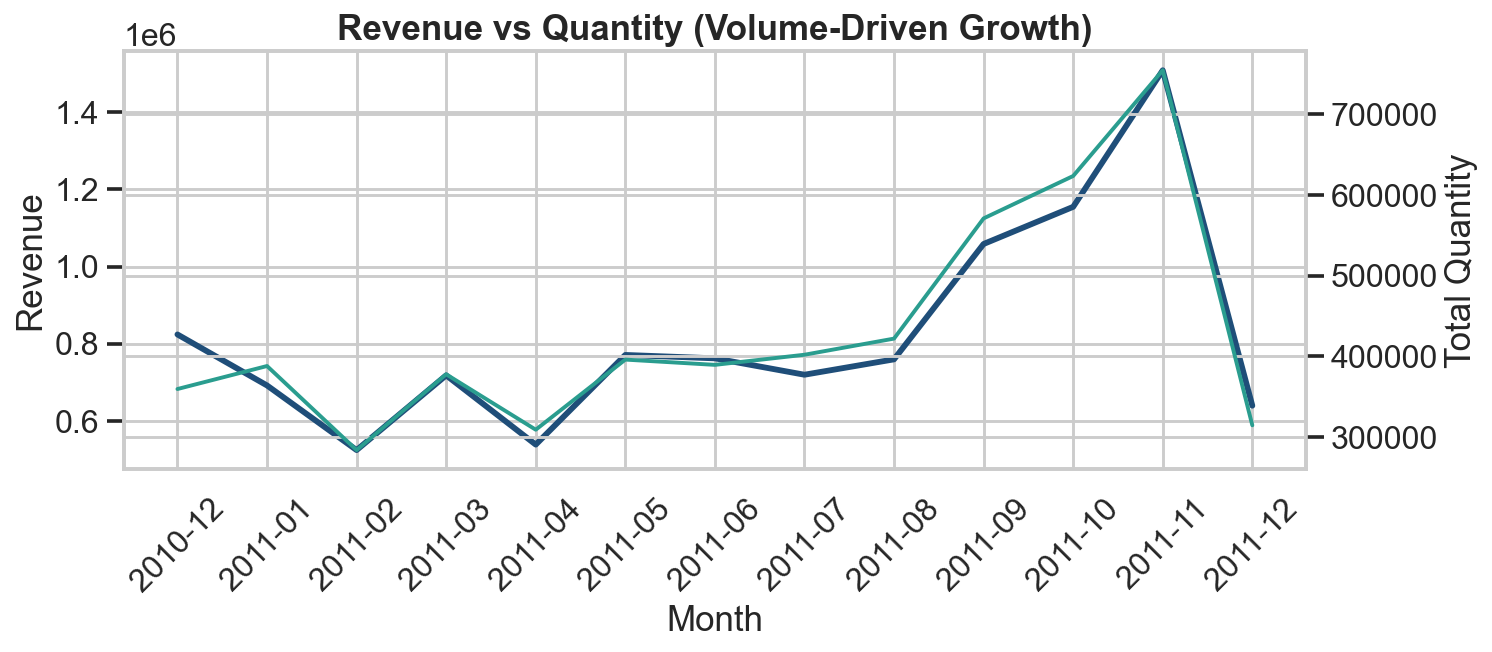

In [48]:
fig, ax1 = plt.subplots(figsize=(11,5))
ax2 = ax1.twinx()

ax1.plot(monthly["InvoiceMonth"], monthly["TotalRevenue"], color=BUSINESS["primary"], linewidth=3, label="Revenue")
ax2.plot(monthly["InvoiceMonth"], monthly["TotalQuantity"], color=BUSINESS["secondary"], linewidth=2, label="Quantity")

ax1.set_title("Revenue vs Quantity (Volume-Driven Growth)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Revenue")
ax2.set_ylabel("Total Quantity")

ax1.tick_params(axis="x", rotation=45)
savefig("02_revenue_vs_quantity_dual_axis.png")
plt.show()

In [49]:
df_products = df_sales[~df_sales["Description"].str.contains("POSTAGE|Manual", case=False, na=False)].copy()

Saved: figures/03_top10_products_revenue.png


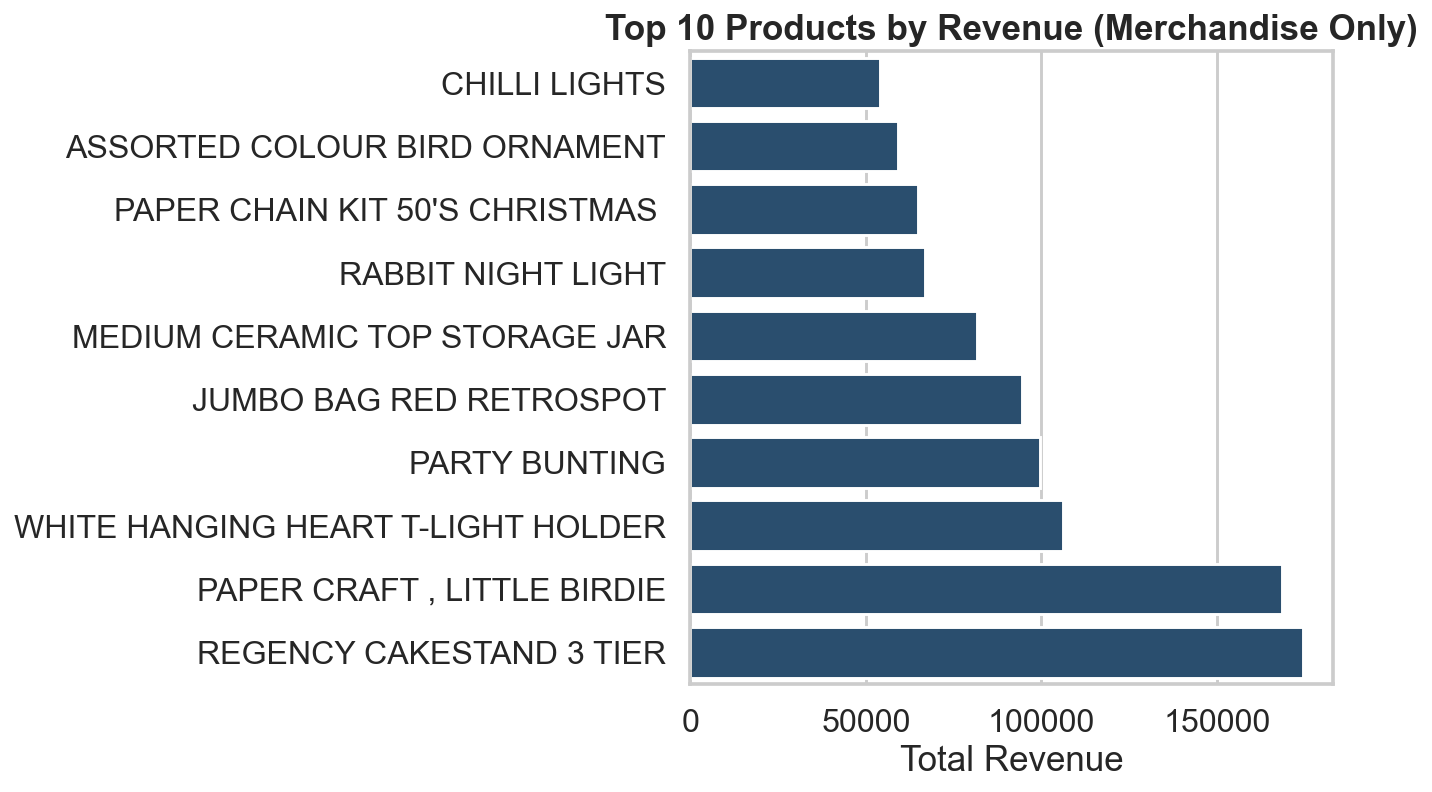

In [50]:
top_prod_rev = (df_products.groupby("Description")["Revenue"]
                .sum().sort_values(ascending=False).head(10).sort_values())

plt.figure(figsize=(10,6))
sns.barplot(x=top_prod_rev.values, y=top_prod_rev.index, color=BUSINESS["primary"])
plt.title("Top 10 Products by Revenue (Merchandise Only)")
plt.xlabel("Total Revenue")
plt.ylabel("")
savefig("03_top10_products_revenue.png")
plt.show()

Saved: figures/04_top10_products_quantity.png


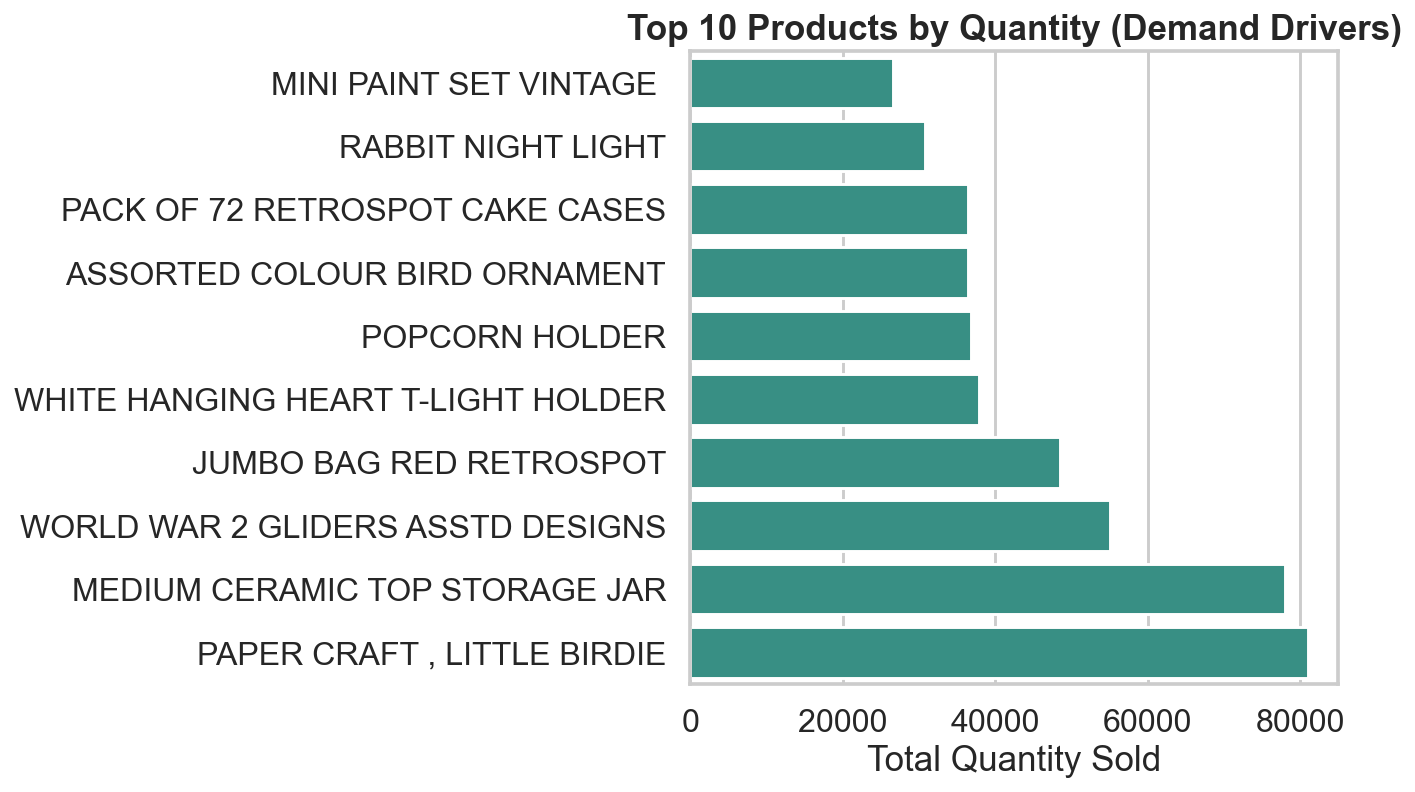

In [51]:
top_prod_qty = (df_products.groupby("Description")["Quantity"]
                .sum().sort_values(ascending=False).head(10).sort_values())

plt.figure(figsize=(10,6))
sns.barplot(x=top_prod_qty.values, y=top_prod_qty.index, color=BUSINESS["secondary"])
plt.title("Top 10 Products by Quantity (Demand Drivers)")
plt.xlabel("Total Quantity Sold")
plt.ylabel("")
savefig("04_top10_products_quantity.png")
plt.show()

Saved: figures/05_top10_customers_revenue.png


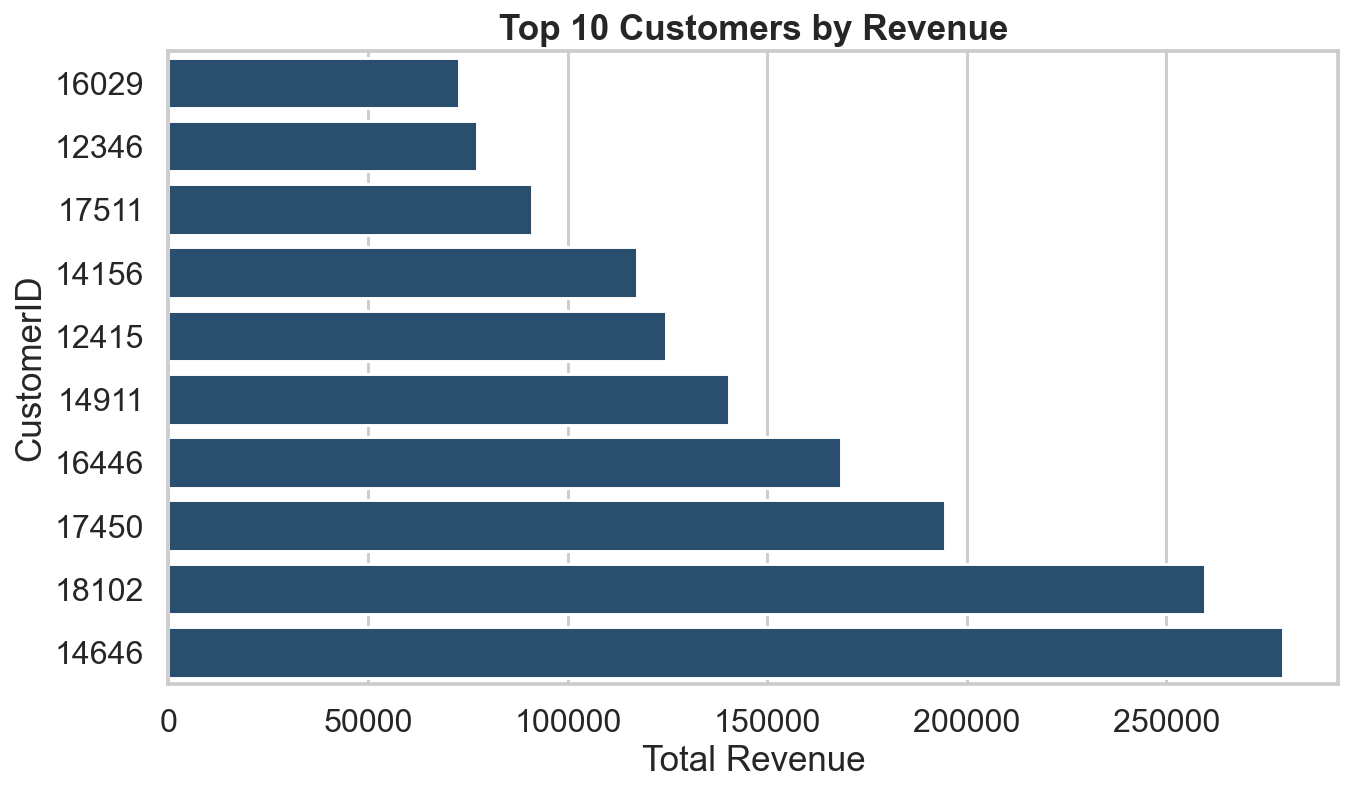

In [52]:
cust_rev = (df_products.dropna(subset=["CustomerID"])
            .groupby("CustomerID")["Revenue"]
            .sum().sort_values(ascending=False))

top_cust = cust_rev.head(10).sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=top_cust.values, y=top_cust.index.astype(int).astype(str), color=BUSINESS["primary"])
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("CustomerID")
savefig("05_top10_customers_revenue.png")
plt.show()

Saved: figures/06_pareto_customer_concentration.png


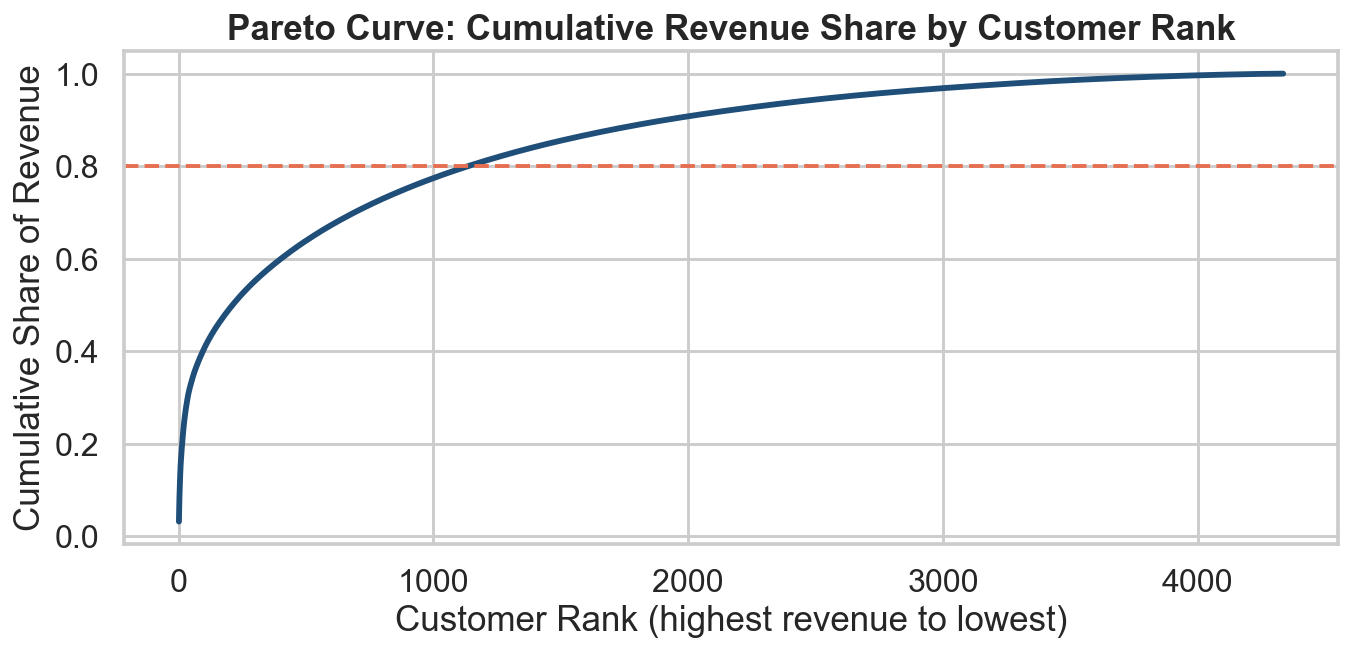

In [53]:
total_rev = cust_rev.sum()
cum_share = (cust_rev.cumsum() / total_rev).reset_index()
cum_share.columns = ["CustomerID", "CumulativeShare"]
cum_share["CustomerRank"] = np.arange(1, len(cum_share) + 1)

plt.figure(figsize=(10,5))
plt.plot(cum_share["CustomerRank"], cum_share["CumulativeShare"], color=BUSINESS["primary"], linewidth=3)
plt.axhline(0.8, color=BUSINESS["accent"], linestyle="--", linewidth=2)
plt.title("Pareto Curve: Cumulative Revenue Share by Customer Rank")
plt.xlabel("Customer Rank (highest revenue to lowest)")
plt.ylabel("Cumulative Share of Revenue")
savefig("06_pareto_customer_concentration.png")
plt.show()

Saved: figures/07_top10_countries_revenue.png


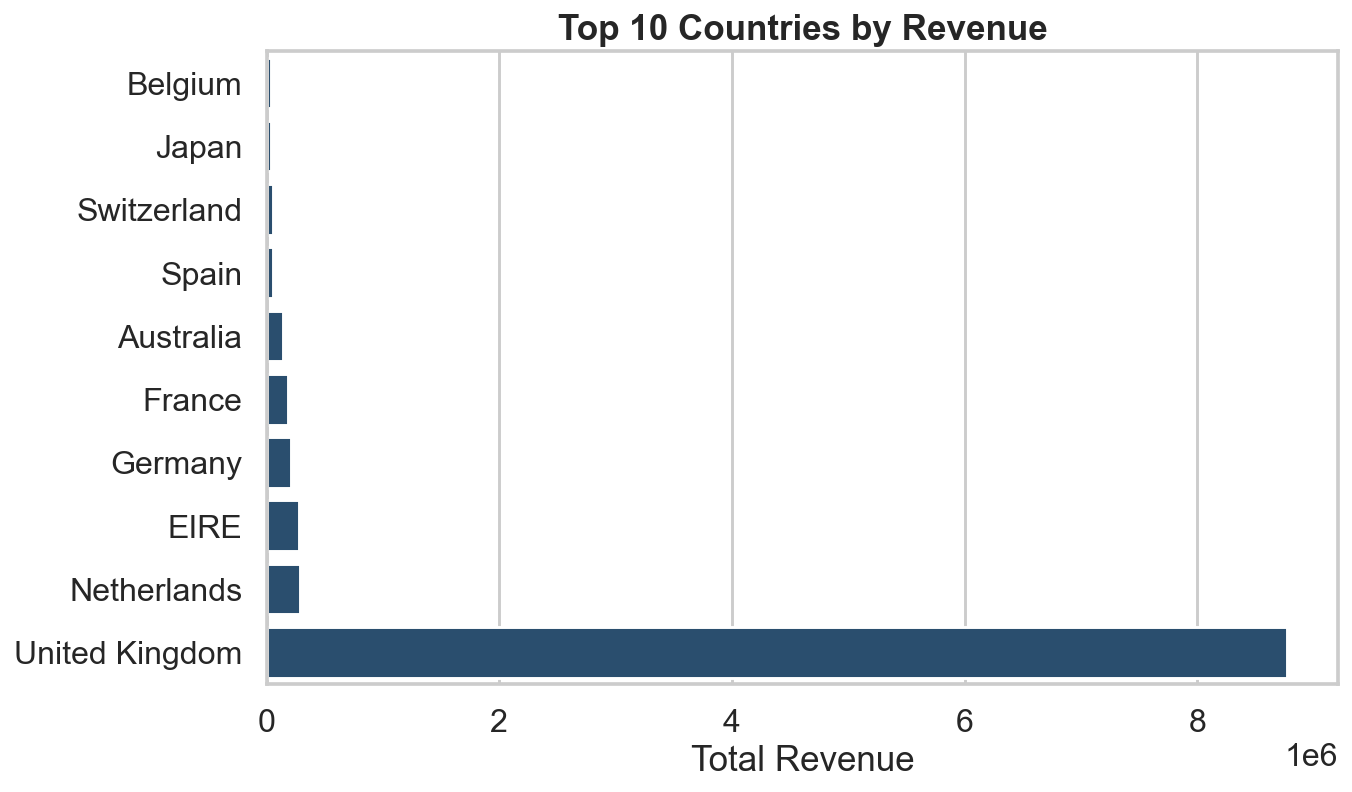

In [54]:
country_rev = (df_products.groupby("Country")["Revenue"]
               .sum().sort_values(ascending=False).head(10).sort_values())

plt.figure(figsize=(10,6))
sns.barplot(x=country_rev.values, y=country_rev.index, color=BUSINESS["primary"])
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("")
savefig("07_top10_countries_revenue.png")
plt.show()

Saved: figures/08_product_portfolio_matrix.png


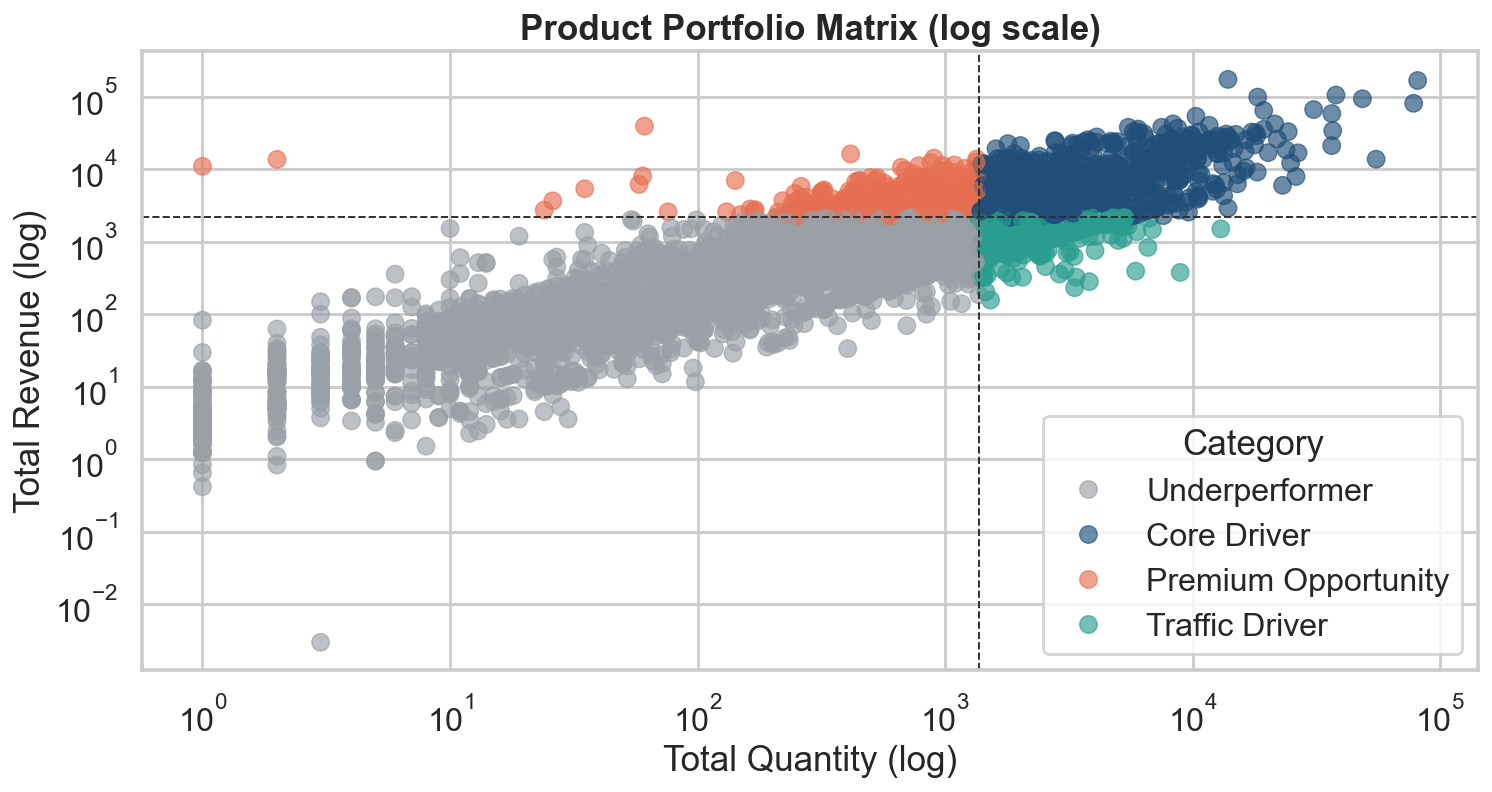

In [55]:
product_metrics = (df_products.groupby("Description")
                   .agg(TotalRevenue=("Revenue","sum"),
                        TotalQuantity=("Quantity","sum"),
                        AvgUnitPrice=("UnitPrice","mean"))
                  )

rev_q = product_metrics["TotalRevenue"].quantile(0.75)
qty_q = product_metrics["TotalQuantity"].quantile(0.75)

product_metrics["Category"] = "Underperformer"
product_metrics.loc[(product_metrics["TotalRevenue"]>=rev_q) & (product_metrics["TotalQuantity"]>=qty_q), "Category"] = "Core Driver"
product_metrics.loc[(product_metrics["TotalRevenue"]< rev_q) & (product_metrics["TotalQuantity"]>=qty_q), "Category"] = "Traffic Driver"
product_metrics.loc[(product_metrics["TotalRevenue"]>=rev_q) & (product_metrics["TotalQuantity"]< qty_q), "Category"] = "Premium Opportunity"

palette = {
    "Core Driver": BUSINESS["primary"],
    "Traffic Driver": BUSINESS["secondary"],
    "Premium Opportunity": BUSINESS["accent"],
    "Underperformer": "#9aa0a6"  # neutral gray
}

plt.figure(figsize=(11,6))
sns.scatterplot(
    data=product_metrics.reset_index(),
    x="TotalQuantity", y="TotalRevenue",
    hue="Category", palette=palette,
    alpha=0.65, edgecolor=None
)
plt.axvline(qty_q, color=BUSINESS["dark"], linestyle="--", linewidth=1)
plt.axhline(rev_q, color=BUSINESS["dark"], linestyle="--", linewidth=1)

plt.xscale("log")
plt.yscale("log")
plt.title("Product Portfolio Matrix (log scale)")
plt.xlabel("Total Quantity (log)")
plt.ylabel("Total Revenue (log)")
plt.legend(title="Category", loc="best")
savefig("08_product_portfolio_matrix.png")
plt.show()